<a href="https://colab.research.google.com/github/KiloDragon/HWinn/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving WA_Marketing-Campaign.csv to WA_Marketing-Campaign (4).csv
        MarketID MarketSize  LocationID  AgeOfStore  Promotion     week  \
count   548.0000        548    548.0000    548.0000   548.0000 548.0000   
unique       NaN          3         NaN         NaN        NaN      NaN   
top          NaN     Medium         NaN         NaN        NaN      NaN   
freq         NaN        320         NaN         NaN        NaN      NaN   
mean      5.7153        NaN    479.6569      8.5036     2.0292   2.5000   
std       2.8770        NaN    287.9737      6.6383     0.8107   1.1191   
min       1.0000        NaN      1.0000      1.0000     1.0000   1.0000   
25%       3.0000        NaN    216.0000      4.0000     1.0000   1.7500   
50%       6.0000        NaN    504.0000      7.0000     2.0000   2.5000   
75%       8.0000        NaN    708.0000     12.0000     3.0000   3.2500   
max      10.0000        NaN    920.0000     28.0000     3.0000   4.0000   

        SalesInThousands  
count 

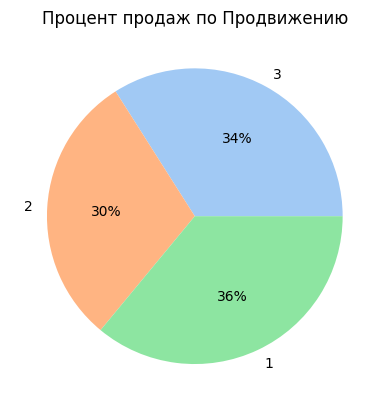

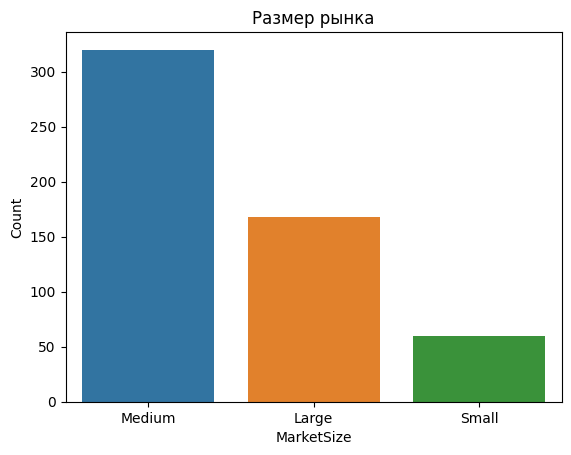

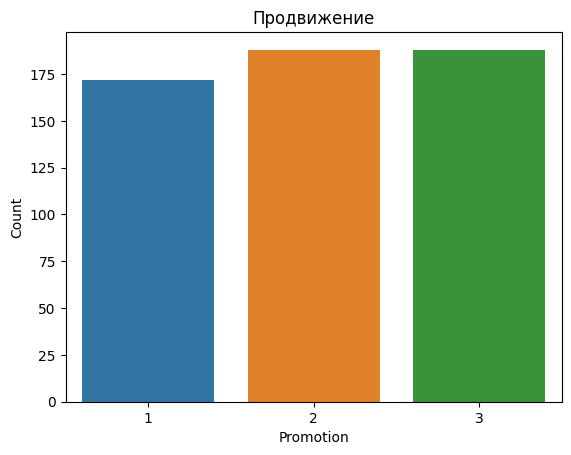

Ttest_indResult(statistic=6.453671702181001, pvalue=3.5506696512135724e-10)


In [ ]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
uploaded = files.upload()
# Тестирование гипотез
# -----------------------------------
# Структура данных:
# MarketID: unique identifier for market
# MarketSize: size of market area by sales
# LocationID: unique identifier for store location
# Promotion: one of three promotions that were tested
# week: one of four weeks when the promotions were run
# SalesInThousands: sales amount for a specific LocationID, Promotion, and week


import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

data = pd.read_csv("WA_Marketing-Campaign.csv")


class Graph:

    def __init__(self, data_XY, chart_name, X, Y):
        self.counts = data_XY.value_counts().reset_index()
        self.counts.columns = [X, Y]
        plt.figure(chart_name)
        sns.barplot(x=X, y=Y, data=self.counts)
        plt.title(chart_name)
        plt.xlabel(X)
        plt.ylabel(Y)

    def Graph_Vis(self):
        return plt.show()


# Строим график по продажам от продвижения
promotion_sales = data['SalesInThousands'].groupby(data["Promotion"]).sum()
sales_sum = data['SalesInThousands'].sum()
promotion_sales_percentage = round((promotion_sales / sales_sum) * 100)
promotion_sales_percentage_visual = plt.figure("Продажи по продвижениям")
colors = sns.color_palette('pastel')[0:5]
plt.pie(promotion_sales_percentage, labels=data["Promotion"].unique(), autopct='%.0f%%', colors=colors)
plt.title ("Процент продаж по Продвижению")
# Подготовка данных для расчета критерия Стьюдента
promo_1 = data['SalesInThousands'].where(data["Promotion"] == 1)
promo_2 = data['SalesInThousands'].where(data["Promotion"] == 2)
promo_3 = data['SalesInThousands'].where(data["Promotion"] == 3)

# Рассчет t-парметра
test_result = ttest_ind(promo_1, promo_2, nan_policy='omit')

if __name__ == "__main__":
    print(data.describe(include='all'))
    # Проведем анализ данных:
    # Визуализация Размеров рынка, Продаж и Продаж по Стартегиям Продвижения на графике
    Graph_Market = Graph(data["MarketSize"], 'Размер рынка', "MarketSize", "Count")
    Graph_Promotion = Graph(data['Promotion'], 'Продвижение', "Promotion", 'Count')
    Graph_Market.Graph_Vis()
    Graph_Promotion.Graph_Vis()
    # Проведя анализ данных предполагаем гипотезы.
    # Предпологаемые гипотезы : Стратегия продвижения 1 эффективнее стратегии 2 по продажам на 6 %
    #                           Стратегия продвижения 3 и стратегия продвижени 2 аналогичны по эффекту на продажи
    #                           Стратегия продвижения 3 эффективнее для большого рынка

    # Проверим гипотезу о том что Стратегия продвижения 1 эффективнее стратегии 2 по продажам на 6 %
    # Попробуем протестировать гипотезу через критерий Стьюдента, вычислим параметры t и p
    print(test_result)
    # Поскольку p значение меньше 0.05 мы отколеняем нулевую гипотезу и можем говорить о том что между продвижением 1
    # и 2 есть различия и продвижение 1 лучше продвижения 2 подвреждая видвинутую гипотезу